In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
color = "#2E3037"
background_color = "Dark" # Dark or White

## Loading data

In [2]:
data = pd.read_csv("../dataset/dataset_4.csv", sep = ";").drop("Unnamed: 0", 1).sample(700000)
data.describe()

SG_UF_RESIDENCIA        TP_SEXO    TP_COR_RACA      TP_ESCOLA  \
count     700000.000000  700000.000000  700000.000000  700000.000000   
mean          16.544206       0.410921       2.140787       0.448439   
std            7.989951       0.492001       1.012563       0.614207   
min            0.000000       0.000000       0.000000       0.000000   
25%           11.000000       0.000000       1.000000       0.000000   
50%           18.000000       0.000000       2.000000       0.000000   
75%           25.000000       1.000000       3.000000       1.000000   
max           26.000000       1.000000       5.000000       2.000000   

           TP_LINGUA       NU_IDADE  TP_ANO_CONCLUIU  Escolaridade_Pai  \
count  700000.000000  700000.000000    700000.000000     700000.000000   
mean        0.527490      19.964147         2.863359          3.339657   
std         0.499244       7.191395         3.971228          1.957549   
min         0.000000       1.000000         0.000000          0.000000   
25%         0.000000      16.000000         0.000000          1.000000   
50%         1.000000      17.000000         1.000000          3.000000   
75%         1.000000      21.000000         4.000000          5.000000   
max         1.000000      86.000000        13.000000          7.000000   

       Escolaridade_Mae   Ocupacao_Pai   Renda_Mensal  Empregada_Domestica  \
count     700000.000000  700000.000000  700000.000000        700000.000000   
mean           4.066689       2.200317       3.496693             0.141877   
std            1.738631       1.511219       3.255157             0.565733   
min            0.000000       0.000000       0.000000             0.000000   
25%            3.000000       1.000000       1.000000             0.000000   
50%            5.000000       2.000000       2.000000             0.000000   
75%            5.000000       3.000000       5.000000             0.000000   
max            7.000000       5.000000      16.000000             3.000000   

             Freezer     Computador         Regiao  Renda_per_capta  \
count  700000.000000  700000.000000  700000.000000    700000.000000   
mean        0.408396       0.688500       2.210526       834.148468   
std         0.623037       0.772994       1.509759      1250.685199   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000       1.000000       299.400000   
50%         0.000000       1.000000       2.000000       499.000000   
75%         1.000000       1.000000       4.000000       831.666667   
max         4.000000       4.000000       4.000000     30000.000000   

       Celulares_por_pessoa        Acertou  
count         700000.000000  700000.000000  
mean               0.672828       0.717633  
std                0.311276       0.450151  
min                0.000000       0.000000  
25%                0.500000       0.000000  
50%                0.666667       1.000000  
75%                1.000000       1.000000  
max                4.000000       1.000000

## Reducing dimension with PCA

### Standarizing values

In [3]:
data_std = data.drop(["DESEMPENHO_BAIXO", "Acertou", "Previsao"], 1)[:]
for col in data_std.columns:
    mean = data_std[col].mean()
    std = data_std[col].std()
    data_std[col] = (data_std[col]-mean)/std

### Applying PCA

In [4]:
pca = PCA(n_components=2).fit(data_std)
pca_2d = pca.transform(data_std)
print("Explained Variance: " + str(100*round(sum(pca.explained_variance_ratio_), 2)) + "%.")

Explained Variance: 40.0%.


## Plotting variables

### DESEMPENHO_BAIXO

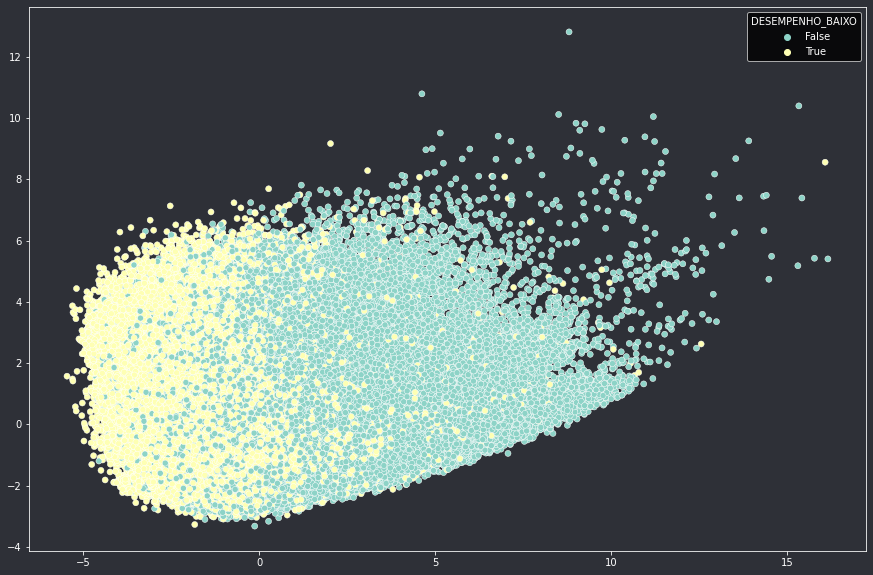

In [5]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["DESEMPENHO_BAIXO"])

### Predictions

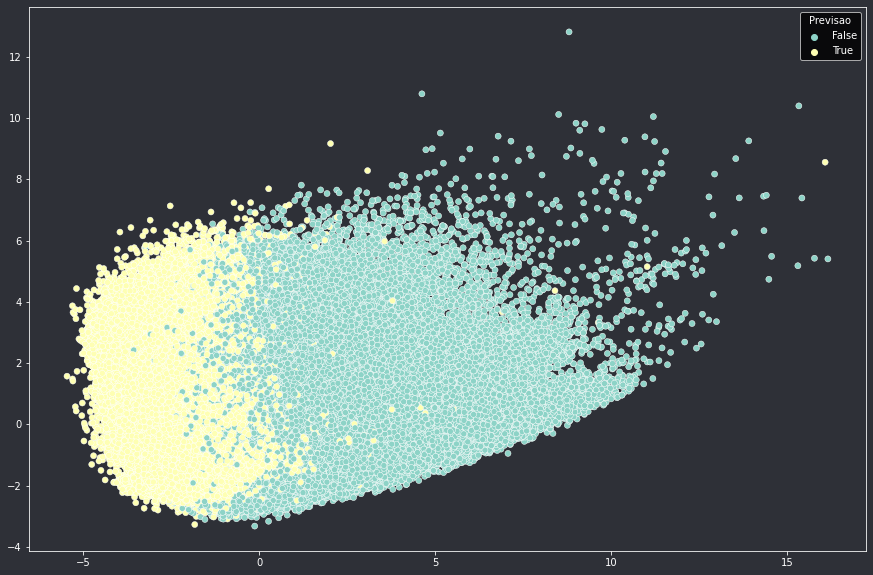

In [6]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Previsao"])

### Errors

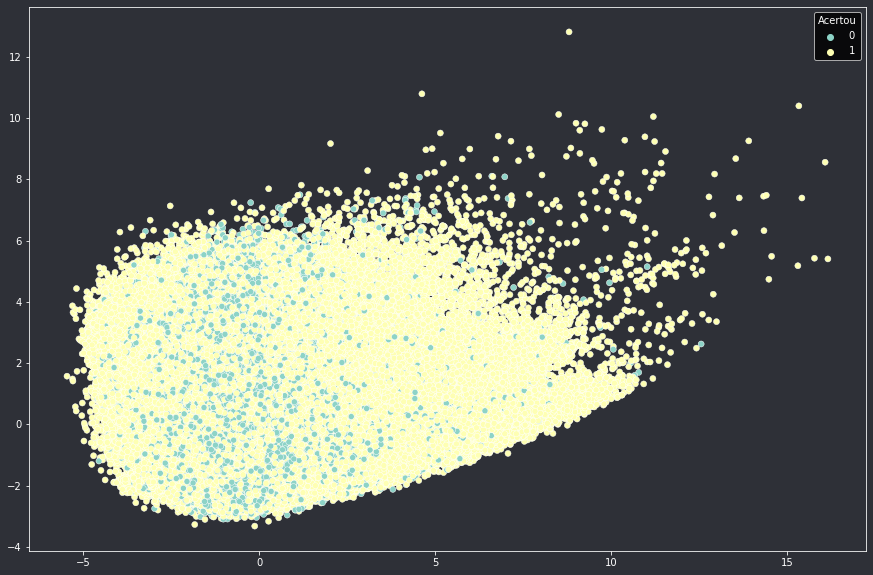

In [7]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Acertou"])

### TP_SEXO

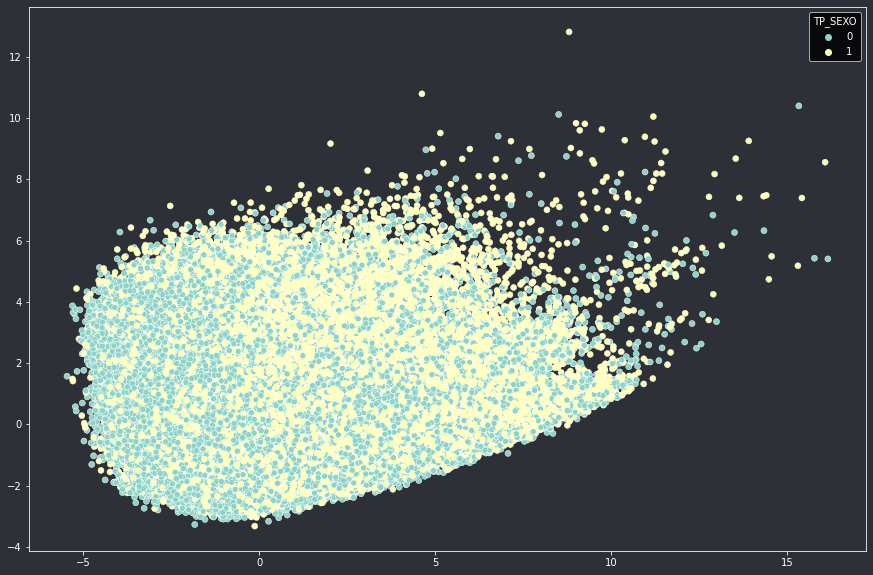

In [8]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["TP_SEXO"])

### TP_COR_RACA

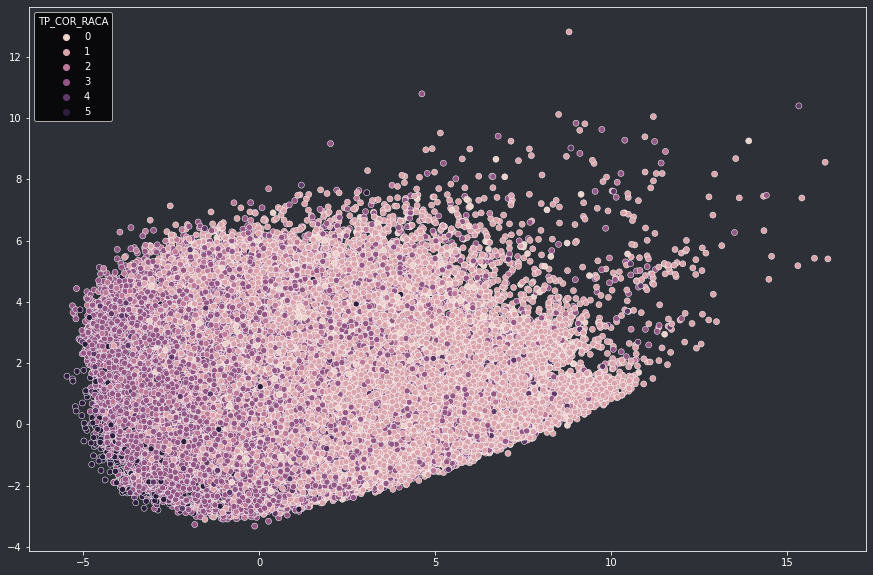

In [9]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["TP_COR_RACA"])

### TP_ESCOLA

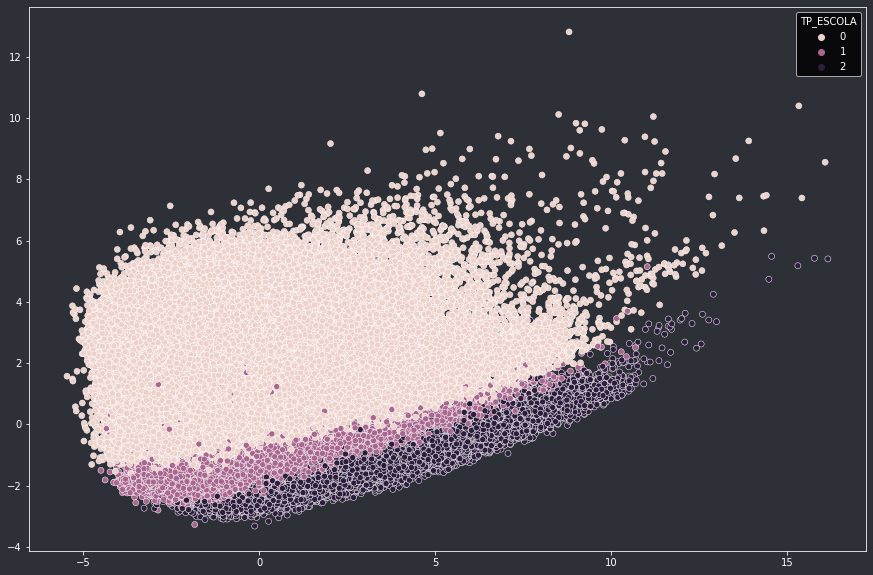

In [10]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["TP_ESCOLA"])

### TP_LINGUA

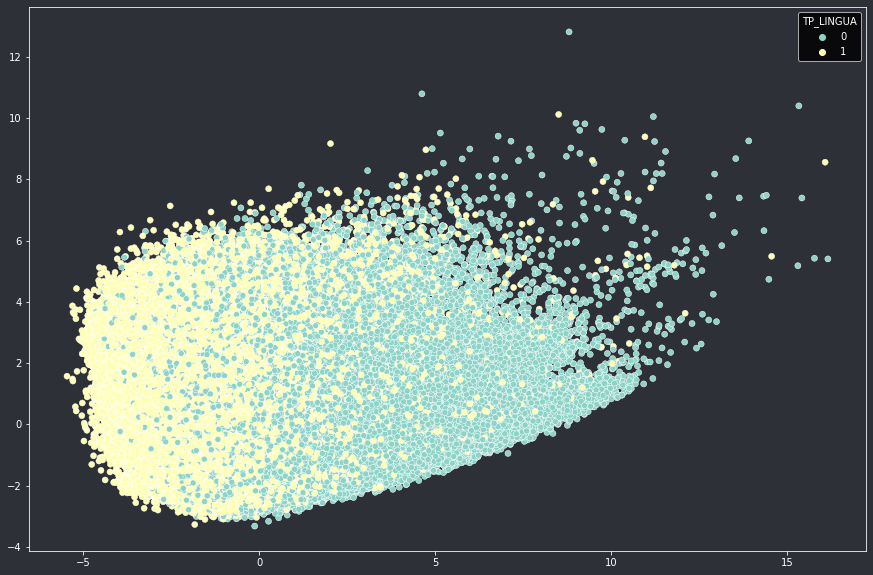

In [11]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["TP_LINGUA"])

### NU_IDADE

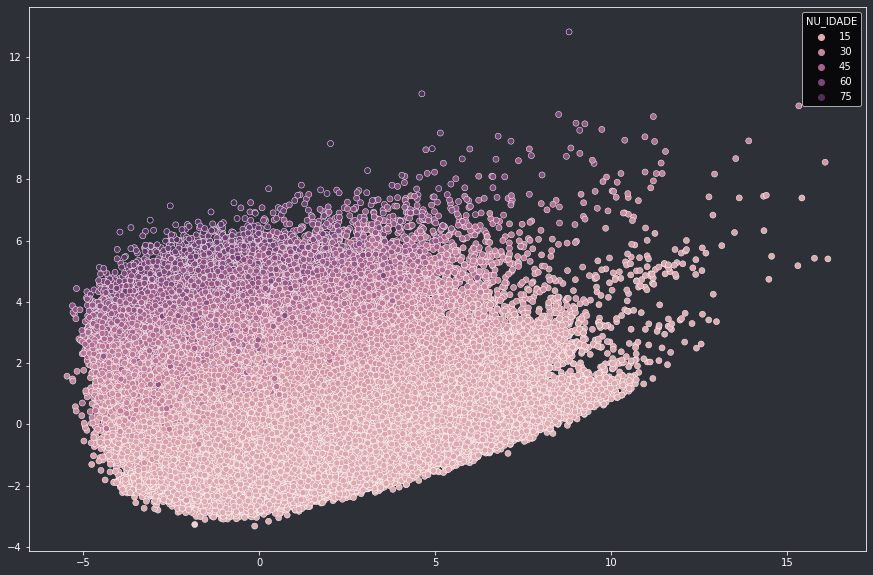

In [12]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["NU_IDADE"])

### TP_ANO_CONCLUIU

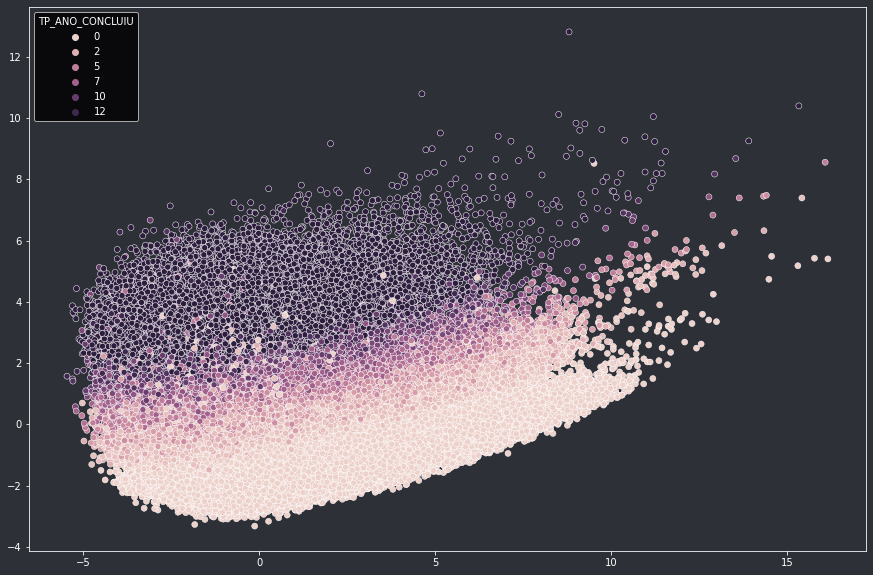

In [13]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["TP_ANO_CONCLUIU"])

### Escolaridade_Pai

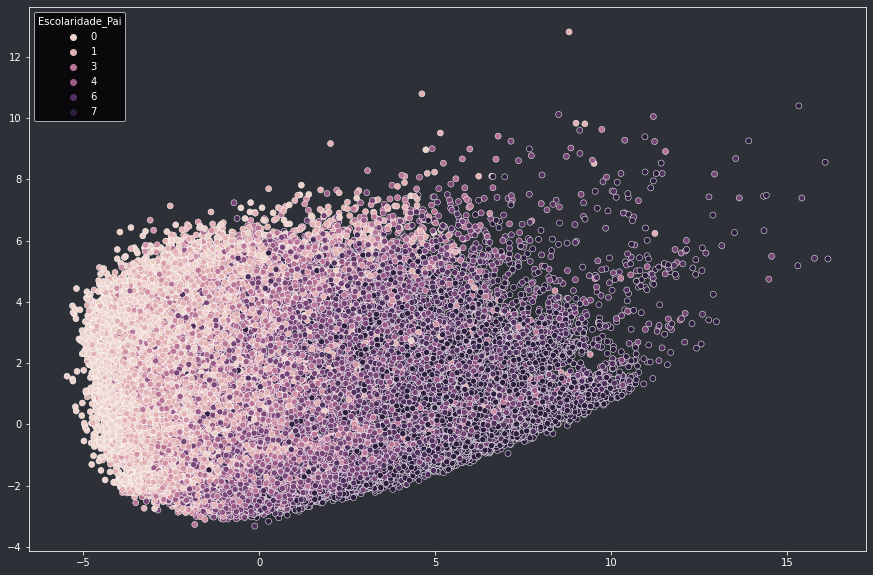

In [14]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Escolaridade_Pai"])

### Escolaridade_Mae

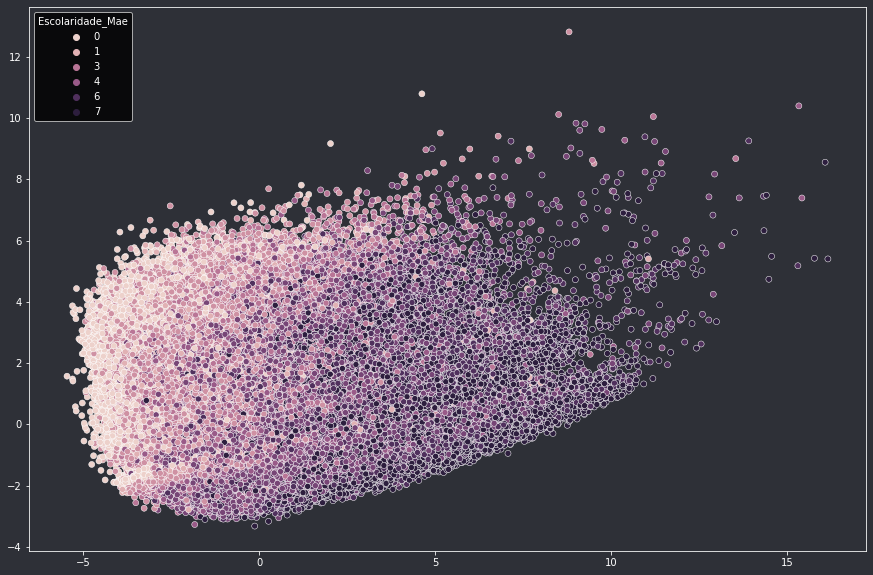

In [15]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Escolaridade_Mae"])

### Ocupacao_Pai

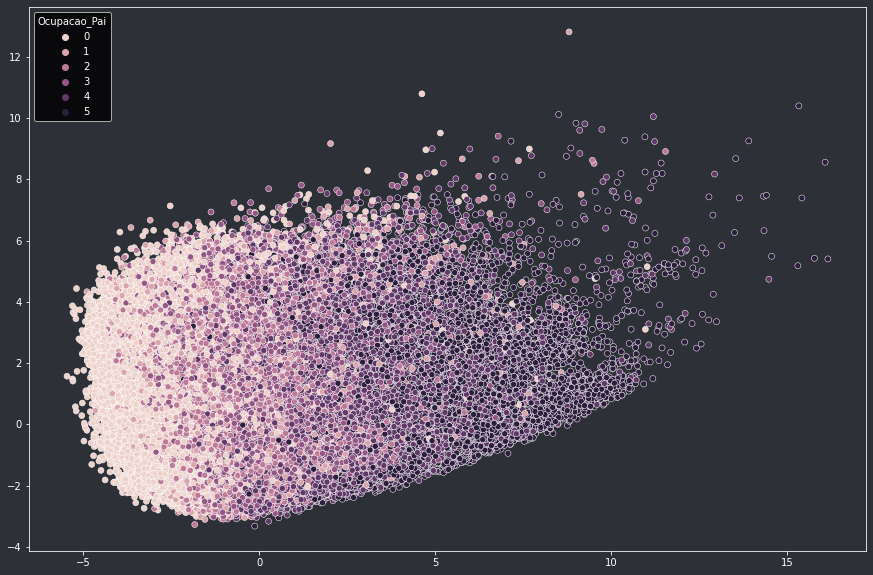

In [16]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Ocupacao_Pai"])

### Ocupacao_Mae

In [ ]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Ocupacao_Mae"])

### Renda_Mensal

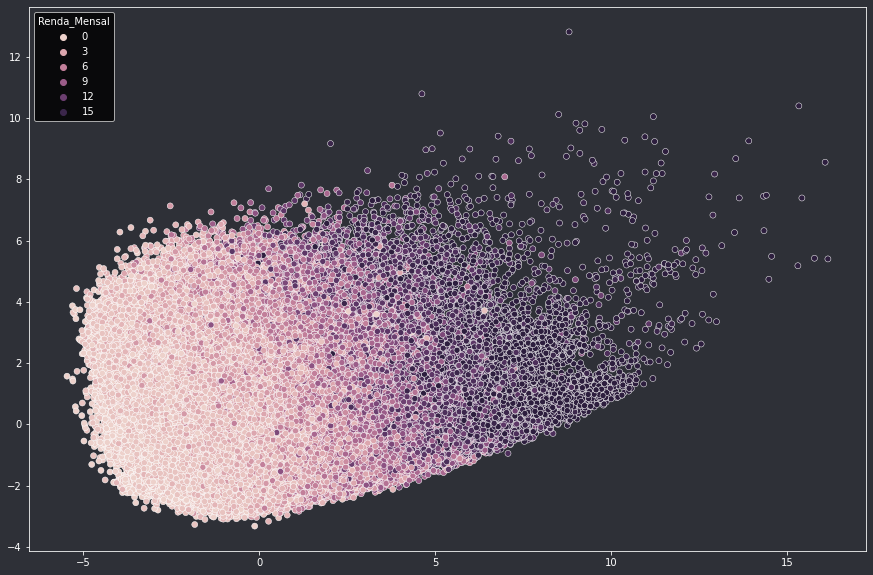

In [17]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Renda_Mensal"])

### Renda_per_capta

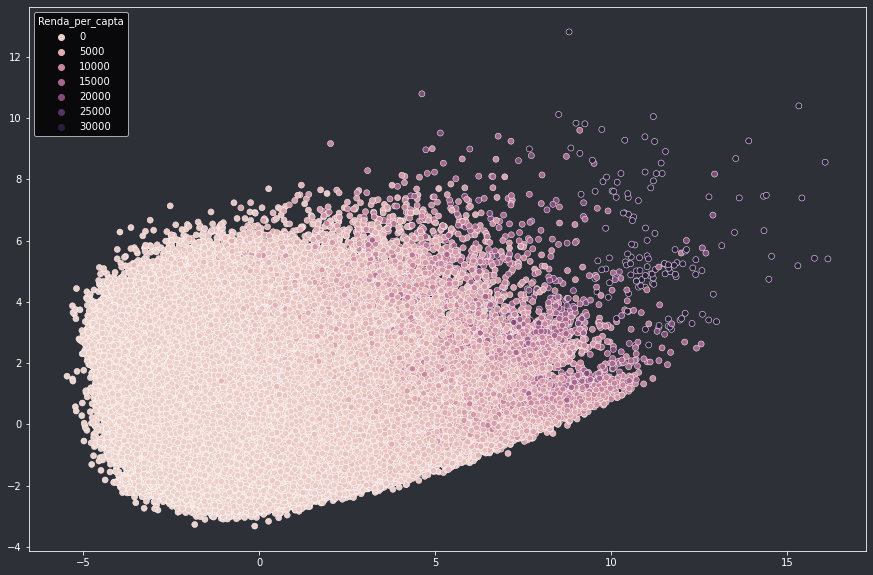

In [22]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Renda_per_capta"])

### Empregada_Domestica

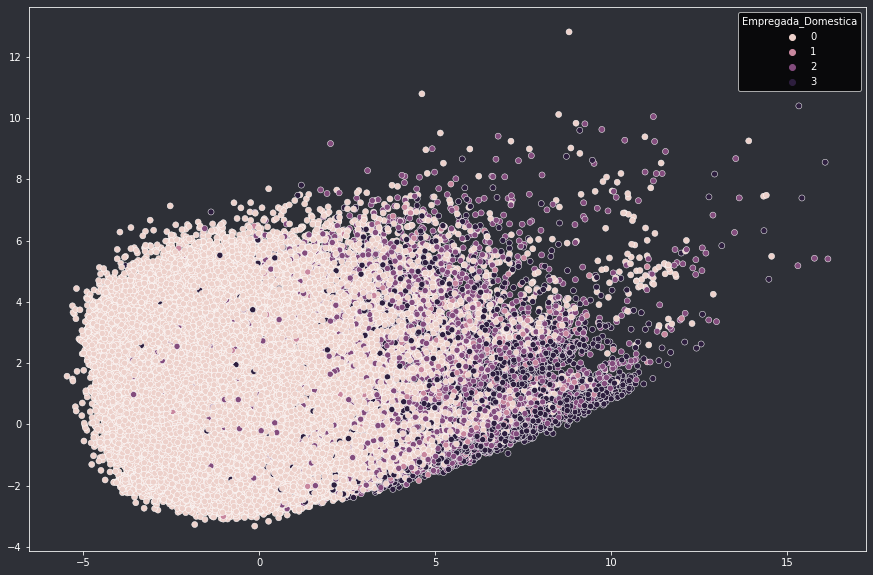

In [18]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Empregada_Domestica"])

### Freezer

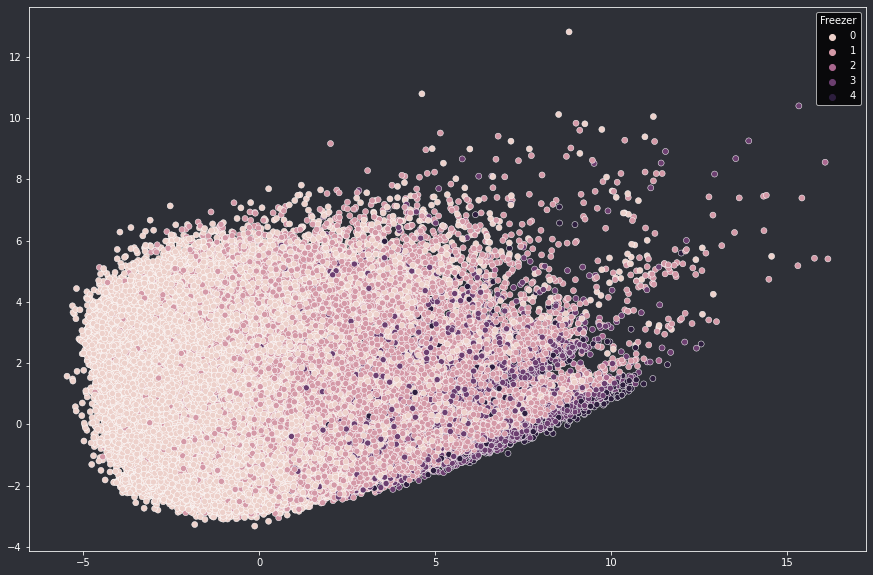

In [19]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Freezer"])

### Regiao

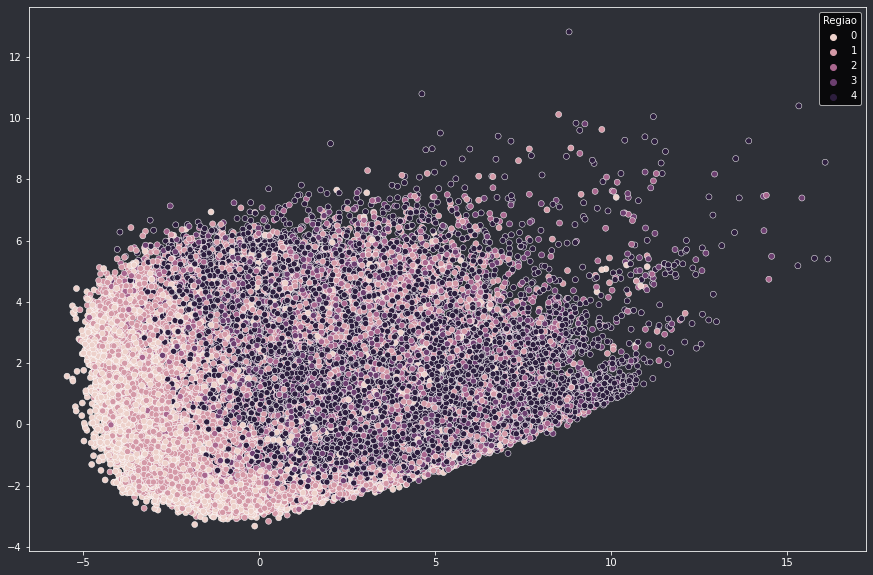

In [20]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Regiao"])

### Celulares_por_pessoa

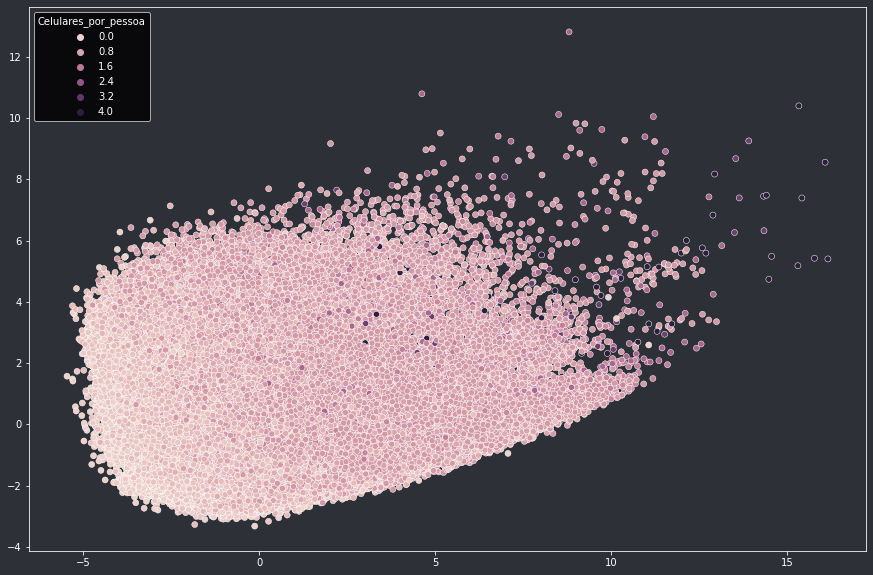

In [21]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Celulares_por_pessoa"])